In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5791,7233-DRTRF,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.40,6444.05,No
203,7018-WBJNK,Male,0,No,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),78.30,1033.95,No
995,3842-IYKUE,Female,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),85.30,2917.5,Yes
4148,9142-XMYJH,Female,0,No,No,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.35,601.6,No
2623,3130-ICDUP,Female,0,No,Yes,2,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Credit card (automatic),80.55,188.1,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"].replace(" ","0" , inplace = True)

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["SeniorCitizen"] = df.SeniorCitizen.replace({0:"NO", 1:"YES"})
df["SeniorCitizen"] = df.SeniorCitizen.astype(str)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

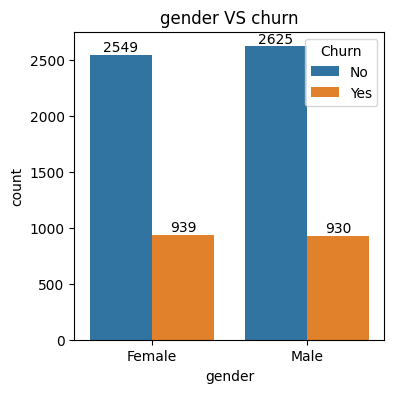

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "gender", data = df, hue="Churn")
for container in ax.containers:
  ax.bar_label(container)
plt.title("gender VS churn")
plt.show()

#   This bar chart visualizes the relationship between customer gender and their churn behavior.

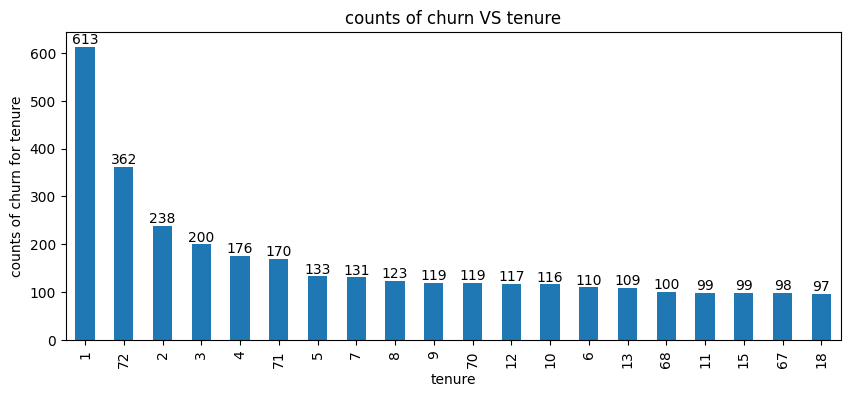

In [ ]:
churn_by_tenure =df.groupby("tenure")["Churn"].count().sort_values( ascending = False).head(20)
ax = churn_by_tenure.plot( kind = "bar",figsize = (10,4) )
ax.bar_label(ax.containers[0])
plt.ylabel("counts of churn for tenure")
plt.title("counts of churn VS tenure")
plt.show()

#   Churn peaks in the first month, indicating early dissatisfaction. Improving onboarding and first-month engagement can help reduce early customer loss.

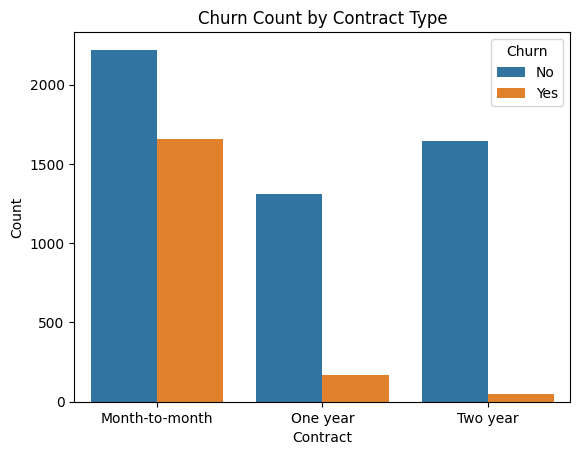

In [ ]:
churn_by_contract = df.groupby(["Contract", "Churn"]).size().reset_index(name="Count")

sns.barplot(data=churn_by_contract, x="Contract", y="Count", hue="Churn")
plt.title("Churn Count by Contract Type")
plt.show()

# Churn is highest among month-to-month contract customers, while long-term contracts (1 or 2 years) show much lower churn. This
# suggests that longer contracts improve customer retention.


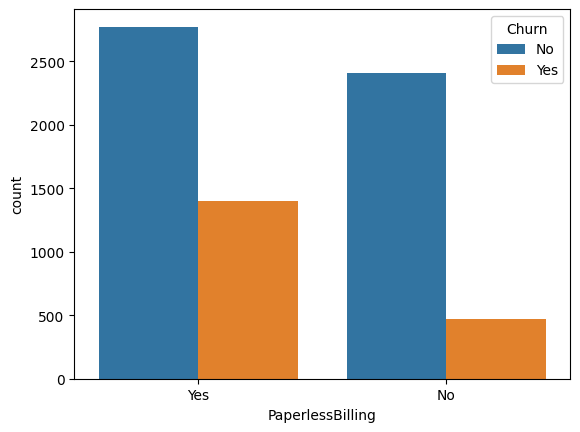

In [ ]:
sns.countplot(data= df, x="PaperlessBilling", hue="Churn" )
plt.show()

#  Customers using paperless billing show significantly higher churn compared to those who don't.

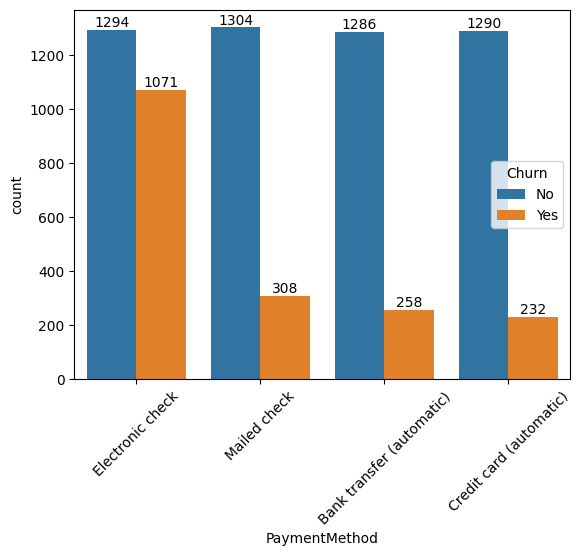

In [ ]:
ax = sns.countplot(data =df, x = "PaymentMethod", hue= "Churn")
for container in ax.containers:
  ax.bar_label(container)
plt.xticks(rotation = 45)
plt.show()

#  Churn is highest among customers using electronic checks, while those using automatic payments (bank transfer or credit card) have the lowest churn.

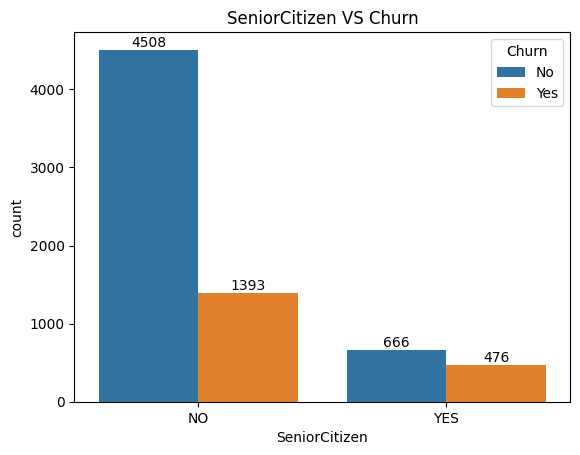

In [ ]:
ax = sns.countplot(data = df, x = "SeniorCitizen", hue ="Churn")
for container in ax.containers:
  ax.bar_label(container)
plt.title("SeniorCitizen VS Churn")
plt.show()

#  Churn is relatively higher among senior citizens compared to non-seniors in proportion. This suggests senior customers may need more support
#  or tailored services to reduce churn.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#   SUMMERY OF THE ANALYSIS :- Customer churn is influenced by several key factors. It is highest during the first month, especially among those on
#   month-to-month contracts, using paperless billing, and paying via electronic check. Senior citizens also show a relatively higher churn rate. In contrast,
#   customers with long-term contracts, automatic payments, and non-paperless billing are more likely to stay. These patterns highlight the need for strong early
#   engagement, flexible billing options, and targeted support for at-risk groups to improve retention.